# Import Necessary Data

In [257]:
# Import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# from sklearn.tree import DecisionTreeRegressor

In [258]:
# Link doc being used and label dataframe
# https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data?resource=download

promo = pd.read_csv(r'C:\Users\Person\AppData\Local\Temp\Temp9d695306-2c2d-4708-afb8-2f2ce05dc98d_archive (4).zip\Marketing and Sales data.csv')
promo.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


# Display Dataframe

In [226]:
promo

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


# Goal & Research Question

I am utilizing this dataset to predict whether or not there is a correlation between sales and the promotion type chosen.
The goal of this machine learning project is to utilize supervised learning and its algorithms, to establish the correlation between sales and marketing budgets. I will be using several algorithms and data visualizations to establish what promotion platform has the greatest correlation to sales. 
Through regression models, is it possible to accurately predict Sales based on TV Advertising budget data?

# Cleaning Data

In the next two cells, I am pulling information from the document to get an idea of the type of data I am working with and  the information that it holds. With the describe function, I will be able to gather data like frequency, number of unique characteristics within each column, the mean, min, max, standard deviation, etc. This will be useful throughout the notebook.

In [227]:
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [228]:
promo.describe(include = 'all')

# Describing all columns of dataframe regardless of data type

,TV,Radio,Social Media,Influencer,Sales
count,4562.000000,4568.000000,4566.000000,4572,4566.000000
unique,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,Mega,NaN
freq,NaN,NaN,NaN,1158,NaN
mean,54.066857,18.160356,3.323956,NaN,192.466602
std,26.125054,9.676958,2.212670,NaN,93.133092
min,10.000000,0.000684,0.000031,NaN,31.199409
25%,32.000000,10.525957,1.527849,NaN,112.322882
50%,53.000000,17.859513,3.055565,NaN,189.231172
75%,77.000000,25.649730,4.807558,NaN,272.507922


Here I will locate the missing values in the document then remove them. After removing these values, I am going to use "inplace" to change the overall dataset to have the missing values removed entirely. 

In [229]:
# Finding any missing values in the dataframe

promo.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [230]:
# Removing any missing values in dataset, inplace= changing original

promo.dropna(inplace=True)

In the following three cells, I want to see how many types of influencers are within the influencer column. After this, I will encode the influencer column in order to convert the object type to a numeric value, then display the new dataframe. 

In [231]:
# Checking to see how many values are within Influencer column

promo.Influencer.unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [232]:
# Encode influencers to convert the type to a numberic value

# influencer_encoded = pd.get_dummies(df['Influencer'])
# influencer_encoded.head()

# Commented this out because I found a more efficient way to encode the document below

In [233]:
promo = pd.get_dummies(promo)
promo

# Set dataframe equal to new one with missing values excluded
# Each category either has a 0 or 1... 1 symbolizing the type of influencer given each budget

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0


# Exploratory Data Analysis 

In [234]:
# Finding the correlation between Sales and the other variables

promo.corr()['Sales']

TV                  0.999497
Radio               0.868638
Social Media        0.527446
Sales               1.000000
Influencer_Macro    0.022349
Influencer_Mega    -0.012530
Influencer_Micro   -0.005218
Influencer_Nano    -0.004367
Name: Sales, dtype: float64

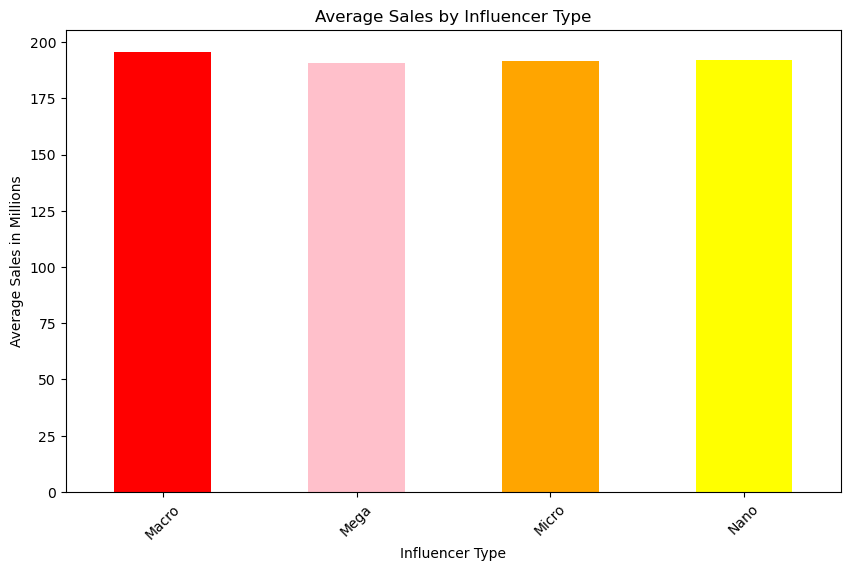

In [256]:
# Taking this data, I am going to create a bar chart displaying influencer type and their average sales

average_sales = pd.Series({ 
    'Macro': 195.613601,
    'Mega': 190.593666,
    'Micro': 191.809095,
    'Nano': 191.934304})

# Creating bar graph and selecting colors
plt.figure(figsize = (10, 6))
colors = ['red', 'pink', 'orange', 'yellow']
average_sales.plot(kind = 'bar', color = colors)

# Title and labels
plt.title('Average Sales by Influencer Type')
plt.xlabel('Influencer Type')
plt.ylabel('Average Sales in Millions')

# Rotate x-axis labels for more readability
plt.xticks(rotation = 45)
plt.show()


According to the bar chart above, the type of influencer to promote a company does not have much of an effect on its sales. Through the describe function and looking at the chart, we are able to visualize the comparison between each type of influencer and their average sales. We see that Macro influencers yield the most results in terms of average sales at 195.6 million dollars, however, there is not much of a drastic difference to nano at 191.9 million, micro at 191.8 million and mega at 190.6 million. This could be due to the fact that each type of influencer reaches a different audience, some bigger than others, but when there are things like sharing posts, customer reviews, recommendations and such, as long as promotion is happening, your audience will see it and more than likely find you. Another reason that the type of influencer doesn't really matter is because different platforms reach wider ranges of audiences. For example, TV and radio may expose a company to those who don't have social media or might not have even considered your product before hearing or seeing the ad. These measures allow for companies to rely less on influencers themselves and more on the means and platforms they choose to utilize.

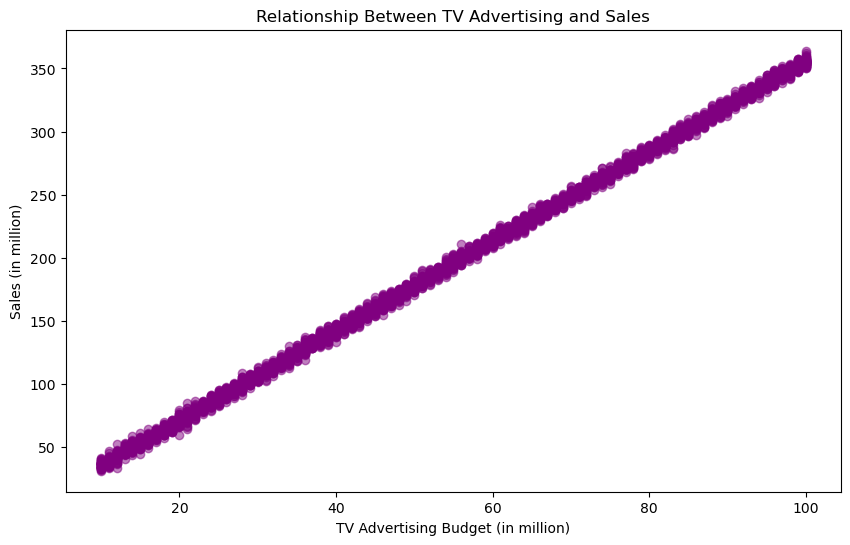

In [236]:
# Creating a scatter plot to show the relationship betweeen TV and Sales

plt.figure(figsize = (10,6))
# Alpha specifies transperancy 
plt.scatter(promo['TV'], promo['Sales'], color = 'purple', alpha = 0.5)

# Title and labels
plt.title('Relationship Between TV Advertising and Sales')
plt.xlabel('TV Advertising Budget (in million)')
plt.ylabel('Sales (in million)')

# Display plot
plt.show()

The scatter plot above shows the relationship between TV advertising budget and the sales received for that particular budget. There is an evident linear correlation between these two varibales; as Tv advertising budget increases, the sales increase as well. TV advertising is one of the most traditional, efficient forms of advertising, and it gives brands the platform to grow, get creative, and make a lasting impact on its viewers more than a sponsored post would. TV advertising gives companies more exposure, raises product awareness, and has a wider reach, creating an increase in customer conversion, loyalty and overall sales. 

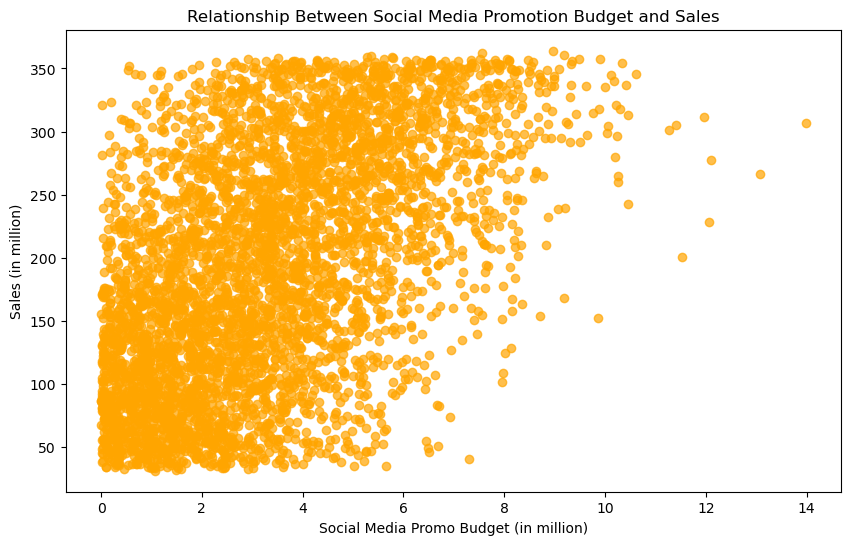

In [237]:
# Scatter plot showing the relationship between social media budget and sales

plt.figure(figsize = (10,6))
plt.scatter(promo['Social Media'], promo['Sales'], color = 'orange', alpha = 0.7)
plt.title('Relationship Between Social Media Promotion Budget and Sales')
plt.xlabel('Social Media Promo Budget (in million)')
plt.ylabel('Sales (in million)')
plt.show()

According to the graph, the social media budget for promotion doesn't have a strong correlation to the sales that it produces. The graph above shows that regardless of the budget price, the advertising may or may not yield more or less sales. If there is a higher budget, the marketing may or may not be successful in terms of sales. The graph does not allow for us to accurately predict the amount of money made in sales based on the advertising budget, unlike the TV budget.

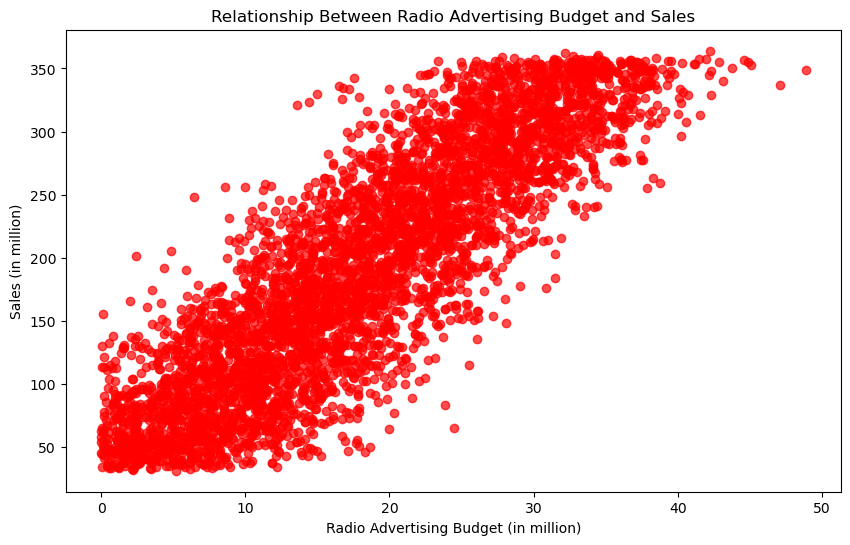

In [238]:
# Create a scatter plot to demonstrate the correlation between radio and sales

plt.figure(figsize = (10, 6))
plt.scatter(promo['Radio'], promo['Sales'], color = 'red', alpha = 0.7)
plt.title('Relationship Between Radio Advertising Budget and Sales')
plt.xlabel('Radio Advertising Budget (in million)')
plt.ylabel('Sales (in million)')
plt.show()

This scatter plot demonstrates the relationship between the radio advertising budget and sales, both in million. This graph has a slightly stronger correlation than the previous one, meaning that we would be able to extract a pretty accurate prediction from it. However, based on the data I have collected so far, and because the graph is not completely liner, TV and its impact on sales would make for the most accurate predictions.

# Linear Regression - Model 1

I will be utilizing the Linear Regression algorithm in order to make my predictions. Linear Regression is usually deployed in machine learning to determine the strength of the association between a series of independent and dependent variables. This form of regression evaluates and quantifies how the dependent variable is altered, while the independent variable takes on different values.

In [239]:
# Doing this again to reference statistical data

promo.describe()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332,0.244611,0.253410,0.252530,0.249450
std,26.104942,9.663260,2.211254,93.019873,0.429903,0.435011,0.434511,0.432742
min,10.000000,0.000684,0.000031,31.199409,0.000000,0.000000,0.000000,0.000000
25%,32.000000,10.555355,1.530822,112.434612,0.000000,0.000000,0.000000,0.000000
50%,53.000000,17.859513,3.055565,188.963678,0.000000,0.000000,0.000000,0.000000
75%,77.000000,25.640603,4.804919,272.324236,0.000000,1.000000,1.000000,0.000000
max,100.000000,48.871161,13.981662,364.079751,1.000000,1.000000,1.000000,1.000000


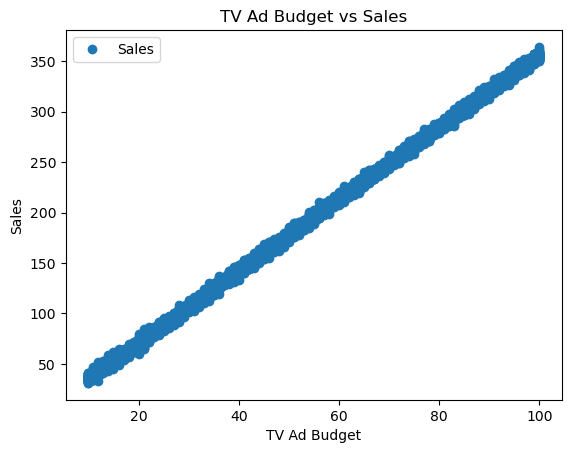

In [240]:
# 2D graph between TV and Sales

promo.plot(x ='TV', y = 'Sales', style ='o')
plt.title('TV Ad Budget vs Sales')
plt.xlabel('TV Ad Budget')
plt.ylabel('Sales')
plt.show()

Attributes are the independent variables, while labels are dependent variables whose values are to be predicted. We want to predict sales based on TV advertising budget.
Our attribute set is the TV column stored in the x-variable (independent variable). 
Our label is the sales column, stored in the y-variable (dependent variable).




In the following cells, I will be reshaping and training the data to test it under the LinearRegression algorithm, retrieving both the slope and intercept to evaluate the change in the graph, then drawing predictions .

In [241]:
X = promo['TV'].values
X = X.reshape(-1,1)
y = promo['Sales'].values
y = y.reshape(-1,1)

In [242]:
# Spliting 80% of the data to training set and 20% of it to test
# Test_size variable is where we specify proportion of the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [243]:
# To train the algorithm import LinearRegression class, instantiate it and use the fit() method with the training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [244]:
# Retrieve the intercept and slope
# LR finds the best value for intercept and slope

print(regressor.intercept_)
print(regressor.coef_)

# Intercept is the predicted value of the outcome Y when the predictor X is equivalent to zero
# Coefficient means as the value of the ind. variable increases, the mean of the dep. variable increases by 3.6
# The expected value of sales(dep.) will be -0.13 when TV budget (ind./predictor) is set to 0

[-0.13437404]
[[3.56128431]]


Below, I will run predictions on the data and compare my predictions to the actual data. Once I come up with the predictions and I create a table with both the actual and predicted values, I will also curate a graph so that we can see the predictions vs actual data visualized side by side.

In [245]:
# Trained our data, now making predictions

y_pred = regressor.predict(X_test)

In [246]:
# Comparing actual output values for x_test with predicted values

act_vs_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
act_vs_pred

,Actual,Predicted
0,277.241337,277.645802
1,236.158713,234.910390
2,167.724668,167.245988
3,159.068412,163.684704
4,170.468878,167.245988
...,...,...
905,312.579789,313.258645
906,61.881910,60.407459
907,140.137007,135.194430
908,153.538323,153.000851


<function matplotlib.pyplot.show(close=None, block=None)>

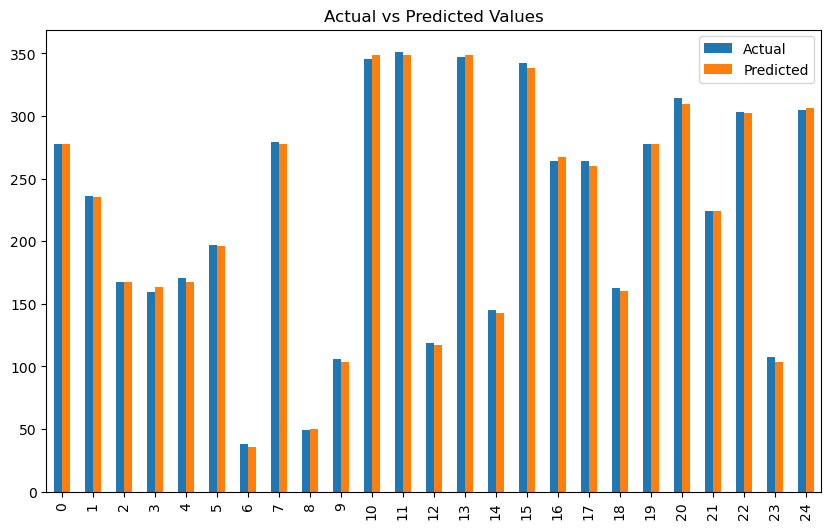

In [247]:
# Visualizing actual vs predicted with a bar graph

act_vs_pred = act_vs_pred.head(25)
act_vs_pred.plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Values')
plt.show

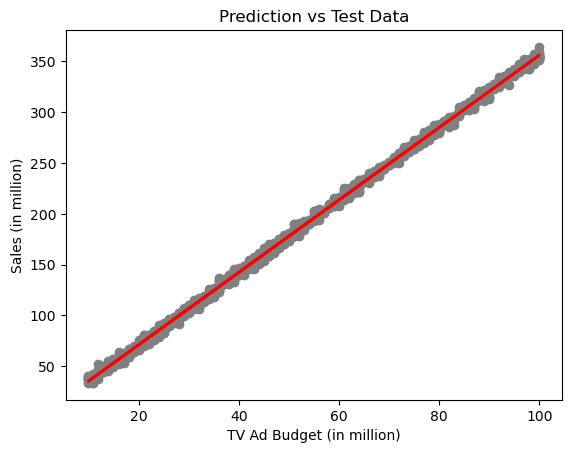

In [248]:
# Visualizing once again, but using straight line with test data

plt.scatter(X_test, y_test, color='grey')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Prediction vs Test Data')
plt.xlabel('TV Ad Budget (in million)')
plt.ylabel('Sales (in million)')
plt.show()

# Evaluation of Algorithm 1

In [249]:
# Finding mean absolute error, mean squared error and root mean squared error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3618669251151285
Mean Squared Error: 8.808483329414544
Root Mean Squared Error: 2.967908915282702


MAE is a measure of the average size of the mistakes in a collection of predictions, in other words, the average absolute difference between the predicted values and the actual values in a dataset.
MSE tells you how close a regression line is to a set of points by finding the average squared difference between the predicted values and the actual values. The lower the MSE, the better the forecast.
RMSE is the average distance between the predicted values from the model and the actual values in the dataset. The lower the RMSE, the better the model fits the data set.

In [250]:
# Calculating the r2 score to see the margin of error for my predictions

print('R-squared score:', metrics.r2_score(y_test, y_pred))

R-squared score: 0.998990876803478


This R2 score shows that there isn't much error; less than 1% of the predictions made by the linear regression model were incorrect. These results show that 99% of the time, the model's predictions align greatly with the actual data points. The closer the R2 score is to 1, the better the regression fit. 

# Decision Tree Regressor - Model 2

Here, I will be running another algorithm to test my predictions. The model I will be using is the DecisionTreeRegressor, which is another regressor utilized in supervised learning for both classification and regression. To do this, I will import the regressor, compare the data of the predictions and actual data, then lastly run an evaluation of its metrics. 

In [251]:
# Testing the data using another algorithm, DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
# Needed to import in this cell because if its done at the beginning, the results of our first model are altered

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [252]:
tree_act_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
tree_act_pred

,Actual,Predicted
0,277.241337,276.933308
1,236.158713,235.888615
2,167.724668,167.232196
3,159.068412,164.131426
4,170.468878,167.232196
...,...,...
905,312.579789,312.937980
906,61.881910,60.434682
907,140.137007,136.081240
908,153.538323,153.050657


<function matplotlib.pyplot.show(close=None, block=None)>

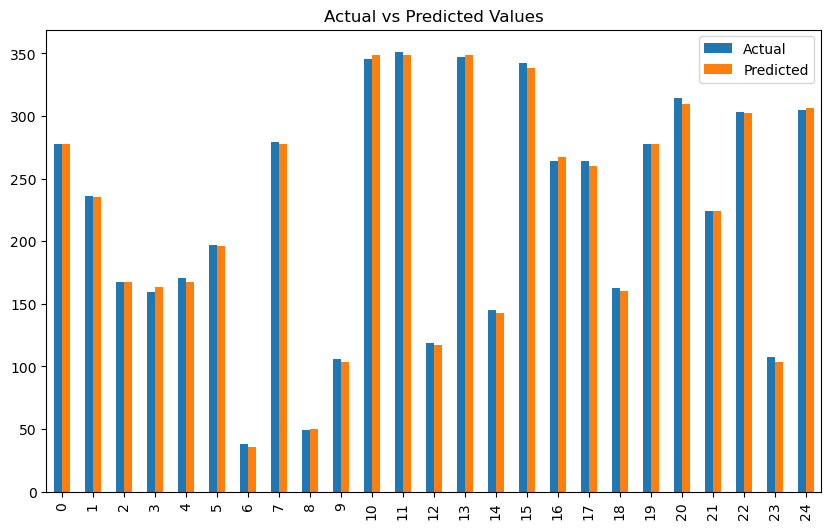

In [253]:
# Including the visualization to show comparison between actual vs predicted values

tree_act_pred = act_vs_pred.head(25)
tree_act_pred.plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Values')
plt.show

# Evaluation of Algorithm 2

In [254]:
# evaluating metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3777043569914267
Mean Squared Error: 9.02216130749228
Root Mean Squared Error: 3.003691280323642


In [255]:
print('R-squared score:', metrics.r2_score(y_test, y_pred))

R-squared score: 0.99896639728797


This coefficient of determination (R2 score) has a slightly lower accuracy than our Linear Regression model, however, it is still quite high. The closer the R2 score is to 1.00, the more precise it is. This result indicates that my prediction model is closely aligned with the actual data and there is minimal margin of error present. 